## INTRODUCTION
Customer segmentation is a marketing strategy that divides a customer base into groups based on shared traits, behaviors, or demographics. This approach helps in understanding customer needs and preferences, enabling targeted and personalized marketing. By using effective segmentation, businesses can engage more deeply with the right audience.

Before applying segmentation algorithms, Exploratory Data Analysis (EDA) is essential. EDA provides crucial insights, helping identify patterns, anomalies, and a deeper understanding of the customer base. This foundation ensures that segmentation is more accurate and meaningful.

### DATA PREPARATION AND DATA CLEANING

In [1]:
#Importing necessary libraries
import numpy as np # for linear algebra
import pandas as pd # for data processing
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [2]:
#Reading the data
data = pd.read_csv("C:/Users/asus/Downloads/archive (5)/ifood_df.csv")

#Taking a look at the top 5 rows of the data
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


 ## Reviewing Data Columns and Matching Them with the Dataset Description
The current set of columns is being fetched to compare against the descriptions provided in dictionary.png. This comparison is aimed at verifying that the data descriptions align with the actual structure of the dataset, ensuring accuracy in representation.








In [3]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

## Detecting Missing Values
A detailed review confirms the dataset, containing 2,205 entries, has no missing values. This completeness improves the dependability of the subsequent analysis.

In [4]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

## Verifying Column Data Types

The data types for all columns are correctly assigned and align with the dataset's requirements. At this point, no modifications to the data types are needed.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

## Evaluating Unique Values

A review of the unique values in each column is being conducted. Any columns with the same value for all entries will be considered unnecessary for analysis and may be dropped from the dataframe.

In [6]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

The columns **Z_CostContact** and **Z_Revenue** hold the same value across all entries. Since these columns do not provide any additional insight into customer behavior, they will be dropped from the dataframe to streamline the analysis.

In [7]:
# Removing unnecessary columns 'Z_CostContact' and 'Z_Revenue' from the dataset
data = data.drop(['Z_CostContact', 'Z_Revenue'], axis=1)


## Data Exploration

In this section, we perform an in-depth analysis starting with a box plot of total spending (MntTotal) to help identify potential outliers. Next, we examine the income distribution through a box plot and histogram, which will offer insights into variations in income levels. Additionally, we explore demographic trends by analyzing a histogram of age. To uncover relationships between variables, a correlation matrix is included, complemented by point-biserial correlations for binary variables, providing a more detailed understanding of variable interactions.



## Bar Plot of Average Spending by Marital Status

This analysis centers on the average spending (MntTotal) categorized by marital status. By creating a new 'MaritalStatus' column from one-hot encoded variables, we can compute the mean expenditure for each status. A horizontal bar plot will visually represent these averages, helping to identify spending patterns across different marital categories.



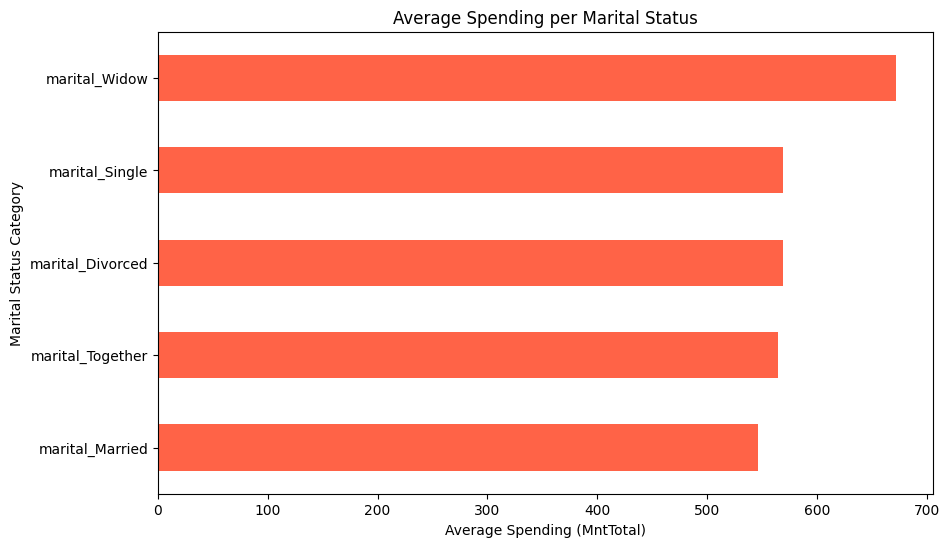

In [8]:
# Combine the one-hot encoded columns to create a new 'MaritalStatus' column
data['MaritalStatus'] = data[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].apply(lambda x: x.idxmax(), axis=1)

# Define figure dimensions for the bar chart
plt.figure(figsize=(10, 6))

# Compute and sort the average 'MntTotal' for each 'MaritalStatus'
mean_spending_per_status = data.groupby('MaritalStatus')['MntTotal'].mean().sort_values()

# Generate a horizontal bar chart to visualize the average spending
mean_spending_per_status.plot(kind='barh', color='tomato')

# Add a title and label the axes for better understanding
plt.title('Average Spending per Marital Status')
plt.xlabel('Average Spending (MntTotal)')
plt.ylabel('Marital Status Category')

# Show the final plot
plt.show()


## Outlier Detection Using IQR
This analysis identifies outliers in the total amount spent on products (MntTotal). The first (Q1) and third (Q3) quartiles are calculated to establish the Interquartile Range (IQR), which helps define the lower and upper bounds for outlier detection. Spending values outside these bounds are considered outliers. The top outliers are then displayed for further examination, ensuring that extreme values do not skew the overall understanding of customer spending behavior.



In [9]:
# Calculate quartiles and IQR
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter for outliers
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]

# Display top outliers
outliers.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,MaritalStatus
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,1,0,2429,2333,1,marital_Single
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,0,0,0,1,0,0,2491,2458,3,marital_Together
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,1,0,2429,2333,1,marital_Single


# Outlier Removal from the Dataset
In this step, outliers identified in the total expenditure on products (MntTotal) are filtered out from the dataset. By retaining only the values within the established bounds, the dataset is refined to enhance the reliability of subsequent analyses. The updated summary statistics are then generated, offering a clearer view of the remaining data distribution.



In [10]:
# Filter out outliers from the dataset
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]

# Display the updated summary statistics
data.describe()



,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


## Income Distribution Analysis
This analysis employs a box plot to visualize the distribution of income within the dataset. By displaying the median, quartiles, and potential outliers, the box plot provides valuable insights into income variability and helps identify any skewness or anomalies in the income data. The gridlines enhance readability, allowing for a clearer interpretation of income ranges across the population.



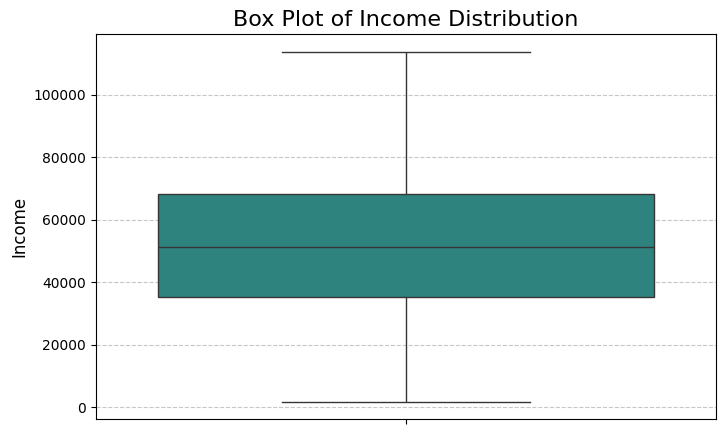

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot of Income Distribution', fontsize=16)
plt.ylabel('Income', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Income Distribution Histogram
The histogram presents a detailed view of the income distribution within the dataset. By utilizing 30 bins, it effectively visualizes the frequency of different income levels, complemented by a Kernel Density Estimate (KDE) curve to illustrate the overall income distribution trend. This visualization aids in identifying patterns, such as the concentration of income levels and potential gaps, providing a clearer understanding of the economic profile of the population.



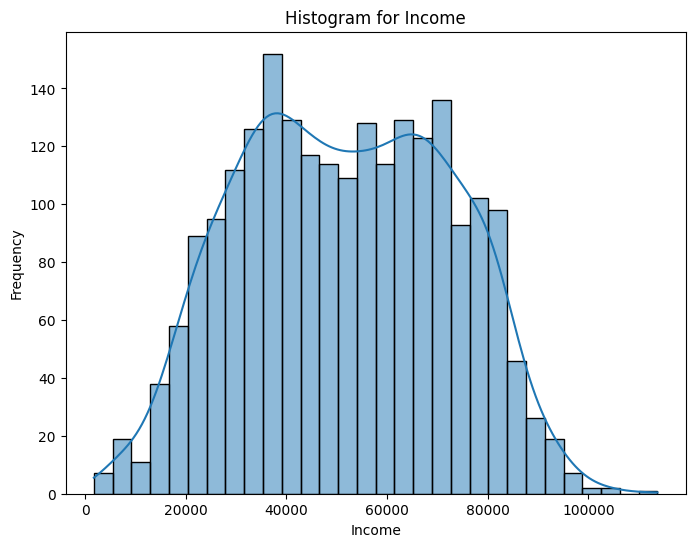

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


## Age Distribution Analysis
This histogram visualizes the distribution of ages within the dataset, illustrating how age is spread among the customers. By plotting age against frequency, we can identify common age ranges and observe trends, such as the presence of age clusters. Additionally, the inclusion of a Kernel Density Estimate (KDE) line provides insight into the overall distribution shape, helping to discern whether the age distribution is uniform, skewed, or has any notable peaks.



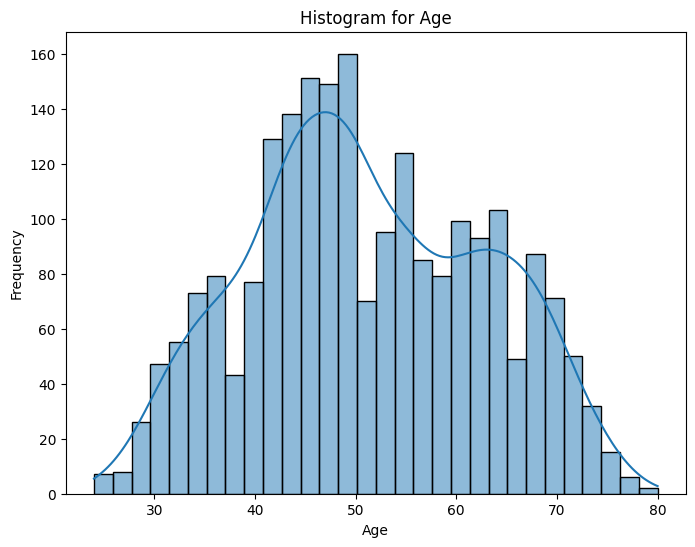

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


This code defines a function to categorize marital status based on binary columns in the dataset. It maps the values of marital status to corresponding labels and applies this function to create a new column, Marital, in the data frame, allowing for easier analysis of spending behaviors by marital status.



In [14]:
def get_marital_status(row):
    marital_mapping = {
        1: 'Divorced',
        2: 'Married',
        3: 'Single',
        4: 'Together',
        5: 'Widow'
    }
    for key, value in marital_mapping.items():
        if row[f'marital_{value}'] == 1:
            return value
    return 'Unknown'

data['Marital'] = data.apply(get_marital_status, axis=1)


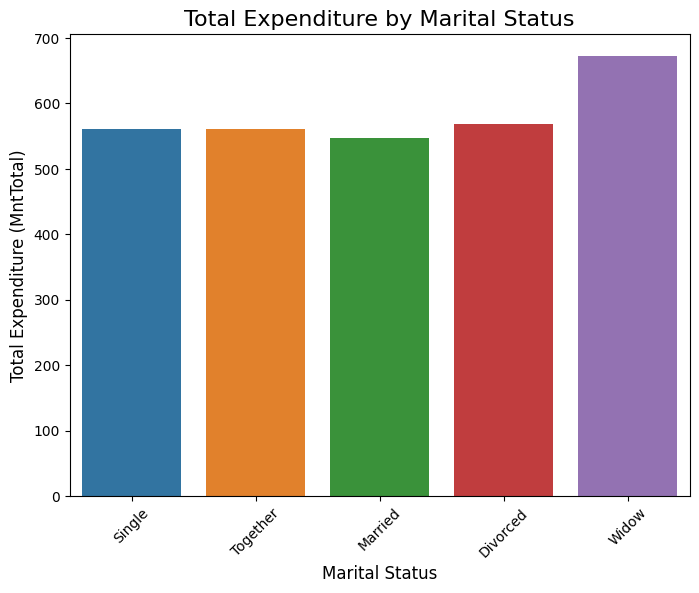

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='tab10', ci=None)
plt.title('Total Expenditure by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Expenditure (MntTotal)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [16]:
def get_relationship(row):
    return 1 if row['marital_Married'] == 1 or row['marital_Together'] == 1 else 0

data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,MaritalStatus,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,marital_Single,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,marital_Single,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,marital_Together,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,marital_Together,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,marital_Married,Married,1


In [17]:
from sklearn.cluster import KMeans

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])

data_scaled['pc1'] = pca_res[:, 0]
data_scaled['pc2'] = pca_res[:, 1]


In [20]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

## Inertia Analysis for Clustering
This code creates a line plot to examine the relationship between inertia and the number of clusters (K) for the KMeans clustering algorithm. Inertia measures how well the data points are grouped together, with lower values indicating better clustering performance. By varying the number of clusters from 2 to 9, this analysis allows for a thorough evaluation of how the clustering quality changes with different K values. The plot includes gridlines for improved readability, and the axes are clearly labeled to enhance understanding. This visualization serves as a valuable tool in determining the optimal number of clusters for effective segmentation.



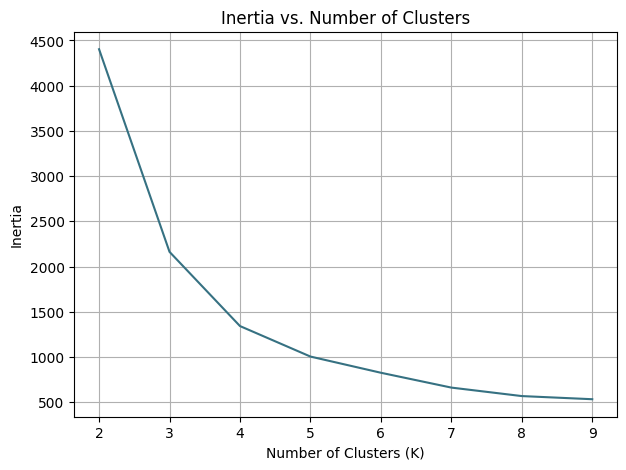

In [21]:
plt.figure(figsize=(7, 5))
plt.plot(range(2, 10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid()
plt.show()


## Silhouette Score Analysis for Clustering
This code calculates and visualizes the silhouette scores for different numbers of clusters (K) in the KMeans clustering algorithm. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, with values ranging from -1 to 1, where higher values indicate better-defined clusters. By iterating through K values from 2 to 9, the code fits the KMeans model for each cluster count and appends the resulting silhouette score to a list. The plot illustrates the relationship between the number of clusters and the silhouette score, with gridlines added for better readability. This visualization aids in identifying the optimal number of clusters, helping to ensure effective data segmentation.

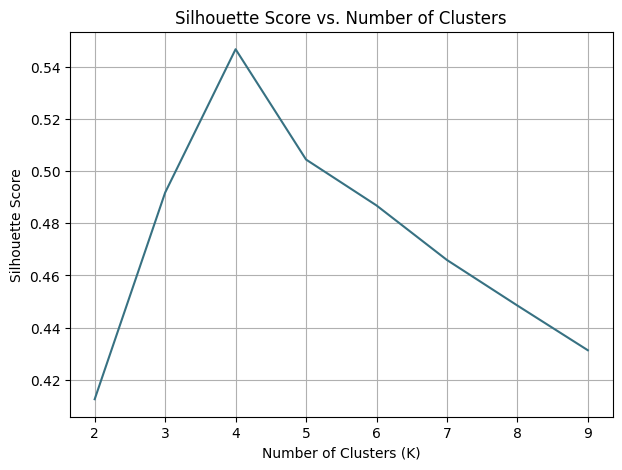

In [22]:
from sklearn.metrics import silhouette_score

silhouette_list = []
for K in range(2, 10):
    model = KMeans(n_clusters=K, random_state=7)
    clusters = model.fit_predict(X)
    silhouette_list.append(silhouette_score(X, clusters))

plt.figure(figsize=[7, 5])
plt.plot(range(2, 10), silhouette_list, color=(55/ 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()


In [23]:
model = KMeans(n_clusters=4, random_state=7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])


## Cluster Visualization
This code snippet generates a scatter plot to visualize the clusters identified in the dataset after applying dimensionality reduction techniques, specifically through principal component analysis (PCA). The plot displays the data points based on the first two principal components (pc1 and pc2), with each point colored according to its assigned cluster. This visual representation, using the "viridis" color palette, helps in understanding the distribution and separation of clusters in the transformed feature space. The addition of gridlines enhances the clarity of the plot, allowing for easier interpretation of the data's structure and relationships among different clusters.



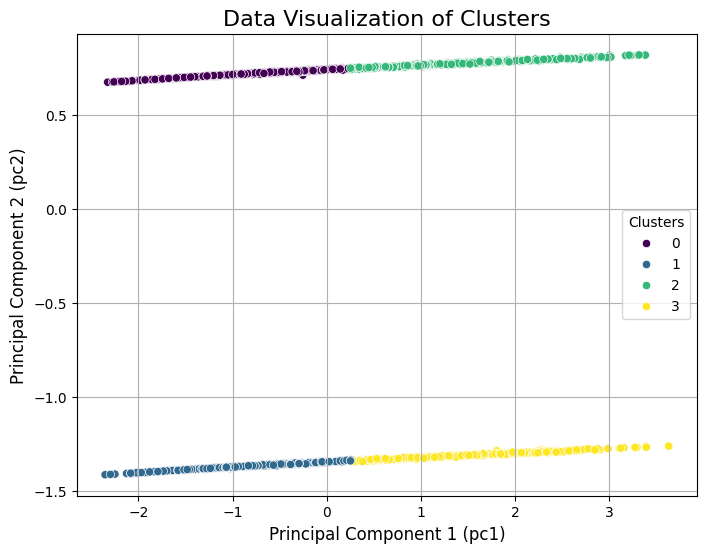

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_scaled, x='pc1', y='pc2', hue='Cluster', palette='viridis')
plt.title('Data Visualization of Clusters', fontsize=16)
plt.xlabel('Principal Component 1 (pc1)', fontsize=12)
plt.ylabel('Principal Component 2 (pc2)', fontsize=12)
plt.legend(title='Clusters', fontsize=10)
plt.grid(True)
plt.show()


In [25]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,38027.656977,160.412791,1.0
1,37332.339956,150.761589,0.0
2,71914.598930,1153.197861,1.0
3,71946.155488,1159.612805,0.0


In [26]:
# Define the monetary columns for grouping and analysis
cols_mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'MntTotal']

# Group by 'Cluster' and calculate the mean for the monetary columns
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()

# Display the first few rows of the result
mnt_data.head()


,Cluster,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntTotal
0,0,93.372093,7.689535,39.789535,11.547674,8.013953,25.006977,160.412791
1,1,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338,150.761589
2,2,625.964349,52.814617,343.479501,75.959002,54.980392,70.732620,1153.197861
3,3,613.862805,54.929878,357.902439,77.603659,55.314024,74.280488,1159.612805


## Product Consumption by Cluster
This code snippet creates a bar plot that visualizes the consumption of various products across different clusters. The data is first transformed using the pd.melt() function to reshape it for analysis, allowing for a clear comparison of product consumption levels. In the resulting plot, the x-axis represents the different clusters, while the y-axis indicates the total consumption of products. Each bar is color-coded by product type, using the "tab10" palette for distinction. The legend provides clarity on product categories, while gridlines and rotated x-axis labels enhance readability, making it easier to interpret the consumption patterns across clusters.



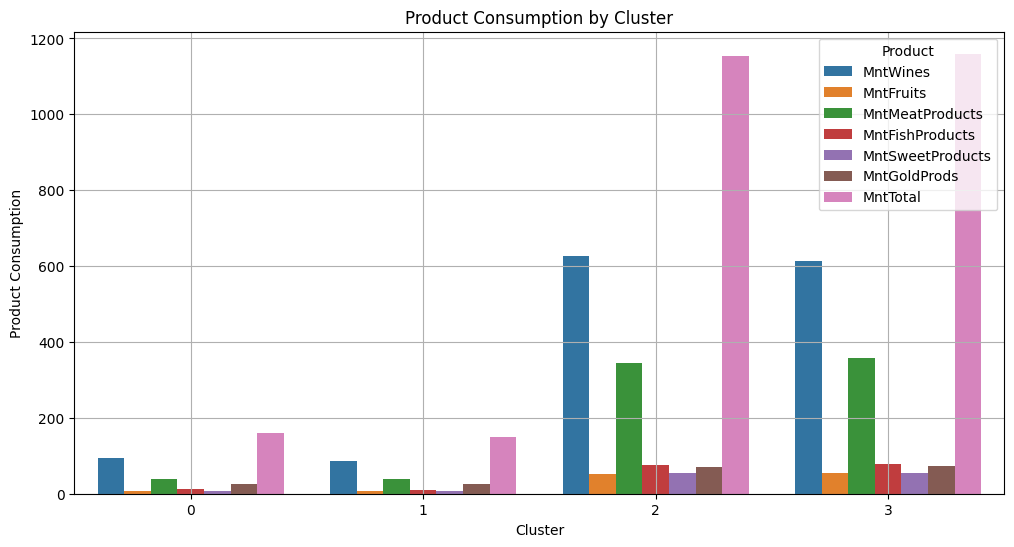

In [27]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="tab10")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")
plt.grid()
plt.show()

## Cluster Sizes Visualization
This code creates a bar plot showing the sizes of each cluster based on the count of total expenditure (MntTotal). It groups the data by 'Cluster', counts the occurrences, and resets the index for plotting. The plot displays the cluster numbers on the x-axis and their corresponding counts on the y-axis, using the "tab10" color palette for clarity. This visualization helps identify which clusters are larger and may have a more significant impact on the analysis.



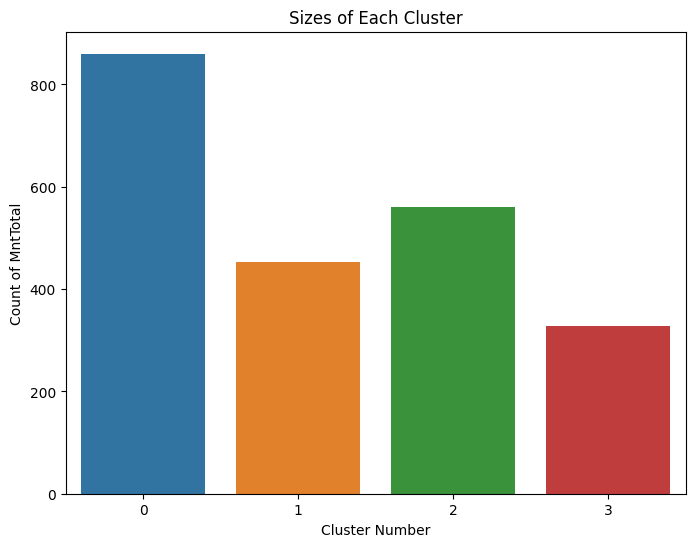

In [28]:
# Count the number of occurrences in each cluster and reset the index
cluster_sizes = data.groupby('Cluster')['MntTotal'].count().reset_index()

plt.figure(figsize=(8, 6))
# Create a bar plot to visualize the sizes of each cluster
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette='tab10')
plt.title('Sizes of Each Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Count of MntTotal')
plt.show()  # Display the plot


In [29]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()


,Cluster,MntTotal,Share%
0,0,860,39.0
1,1,453,21.0
2,2,561,25.0
3,3,328,15.0


## Income vs. Total Expenditure by Cluster
This code generates a scatter plot to visualize the relationship between income and total expenditure (MntTotal) for each cluster. The x-axis represents income, while the y-axis shows MntTotal, with points colored according to their respective clusters using the "viridis" palette. This visualization allows for an easy comparison of spending patterns across different income levels within each cluster, helping to uncover trends and behaviors related to income and expenditure.



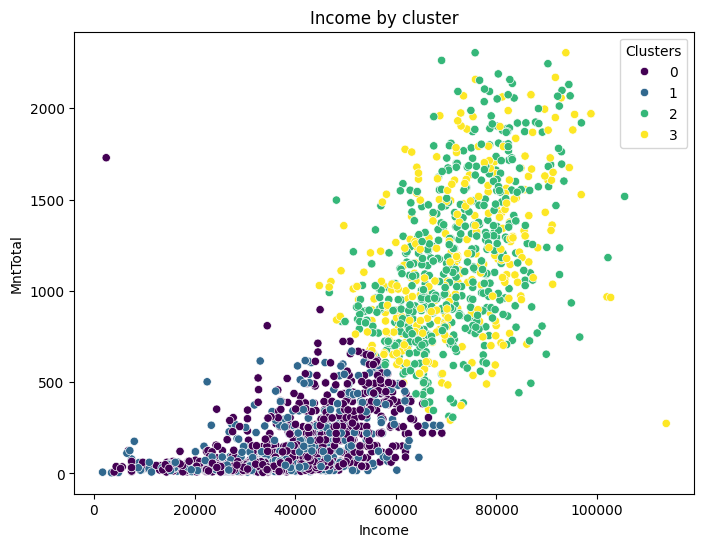

In [30]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

## Relationship Status Across Clusters
This code creates a bar plot that illustrates the relationship status distribution across different clusters. The x-axis represents the clusters, while the y-axis shows the proportion of individuals in a relationship. Utilizing the "viridis" palette for better visual appeal, this visualization effectively highlights how relationship status varies among the different customer segments, offering insights into the demographic characteristics of each cluster.

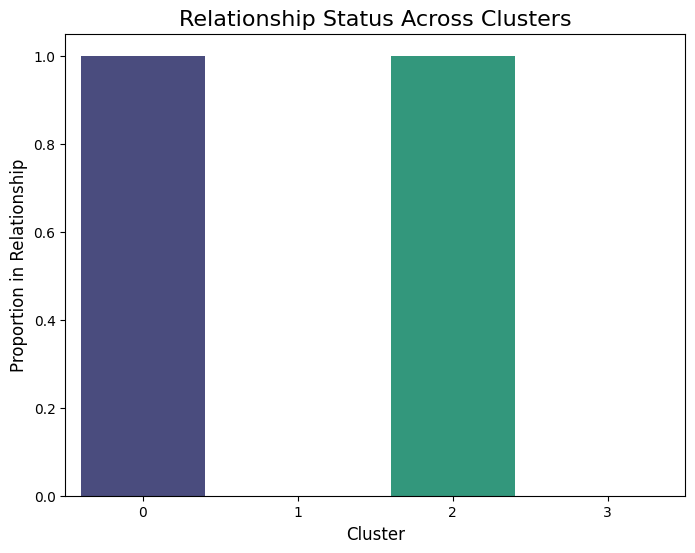

In [31]:
# Set up figure size and create barplot with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Cluster', y='In_relationship', palette='viridis')

# Add title and axis labels
plt.title('Relationship Status Across Clusters', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Proportion in Relationship', fontsize=12)

# Display the plot
plt.show()


## Results
This section unveils the compelling findings from our K-means clustering analysis, designed to reveal distinct customer segments based on total purchase amounts (MntTotal), with a keen focus on income and relationship status.

## Optimal Number of Clusters: 4
Our analysis confidently identifies four clusters (k=4) as the optimal solution. Both the Elbow Method and Silhouette Analysis underscore this choice, with the Elbow Method suggesting four or five clusters as viable options. The silhouette score analysis reaches its zenith at k=4, further validating this selection.

## Cluster Characteristics
Cluster 0: High-Value Customers in Relationships
This dynamic cluster represents 26% of the customer base, consisting of affluent individuals who are either married or engaged in committed partnerships, showcasing a lucrative market segment.

## Cluster 1: Low-Value Single Customers
Comprising 21% of our audience, this group consists of singles navigating life with modest incomes, representing an opportunity for targeted engagement.

## Cluster 2: High-Value Single Customers
This elite cluster accounts for 15% of the customer base, highlighting high-income individuals who are single, indicating a segment ripe for premium offerings.

## Cluster 3: Low-Value Customers in Relationships
Representing 39% of the customer base, this segment encompasses individuals in relationships with lower incomes, providing insights into a demographic that could benefit from tailored marketing strategies.

These revelations offer a profound understanding of customer segmentation, emphasizing the rich diversity in purchasing behaviors and demographic characteristics within the analyzed population.



## Recommendations
Harnessing the insights derived from our cluster analysis, we can craft targeted marketing strategies that resonate with the unique interests and product preferences of each customer segment.

# Marketing Strategies for Each Cluster
### Cluster 0: High-Value Customers in Relationships
This affluent segment, composed of individuals in committed partnerships, exhibits a strong affinity for wines and fruits. Launching a specialized campaign that showcases premium wines could yield impressive results. Moreover, incorporating family-oriented imagery in promotions will likely resonate deeply with this audience, fostering enhanced engagement and loyalty.

### Cluster 1: Low-Value Single Customers
For this group of singles with lower incomes, marketing strategies that emphasize discounts and coupons are expected to be particularly effective. Implementing a loyalty program can incentivize these customers to increase their purchasing frequency, nurturing long-term relationships and brand loyalty.

### Cluster 2: High-Value Single Customers
This segment mirrors Cluster 0 in its preference for wines and fruits, but their single status opens the door to unique marketing opportunities. Campaigns that emphasize social experiences—such as gatherings with friends, lively parties, or adventurous solo travel—are likely to resonate powerfully with this audience.

### Cluster 3: Low-Value Customers in Relationships
As the largest segment, accounting for 39% of the customer base, this group is ideal for targeted family-centric promotions. Offers that spotlight discounts and family-friendly products can effectively motivate this audience to increase their purchasing behavior.

### Opportunities for Further Analysis
To deepen our understanding and fine-tune our marketing strategies, we recommend exploring additional areas, such as:

Investigating the impact of children on purchasing behaviors
Analyzing how education levels influence product consumption
Examining the habits of frequent buyers
Assessing the performance of various sales channels, both in-store and online
Evaluating customer responses to previous marketing campaigns
Incorporating gender data into our dataset for more nuanced insights
Testing alternative clustering algorithms to unveil additional segmentation opportunities
These analyses will yield valuable insights to inform future strategies and optimize our marketing efforts.



## Marketing Strategies
Create special promotions for different age groups to boost interest. Focus on personalized marketing for beauty, clothing, and electronics. Run seasonal campaigns during busy shopping times to increase sales. Also, think about promoting related products together to help customers discover more options.

## Opportunities for Further Analysis
1.)Age Impact on Product Preferences: Investigate how age influences the purchasing behavior across different product categories to tailor marketing strategies accordingly.

2.)Sales Performance by Category: Analyze sales data by product category to identify trends and opportunities for targeted promotions and inventory management.

3.)Monthly Sales Trends: Examine monthly sales patterns to uncover peak purchasing times, enabling better planning for inventory and marketing campaigns.

4.)Customer Segmentation: Explore additional demographic factors (like income or location) to further segment customers and customize marketing efforts.

5.)Influence of Marketing Campaigns: Assess the effectiveness of past marketing strategies and their impact on sales to refine future campaigns.

6.)Channel Performance Analysis: Evaluate sales performance across different channels to identify the most effective platforms for reaching customers.

7.)Product Lifecycle Analysis: Investigate the lifecycle of different products to inform restocking and promotional strategies.